In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

a = pd.read_csv('train.csv')
a = a.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

a.head()
a.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
a.loc[a.Sex == 'female', 'Sex'] = 0
a.loc[a.Sex == 'male', 'Sex'] = 1
a.Sex = a.Sex.astype('int64')
a.head()
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 52.3+ KB


In [78]:
a.loc[a.Embarked == 'C', 'Embarked'] = 0
a.loc[a.Embarked == 'Q', 'Embarked'] = 1
a.loc[a.Embarked == 'S', 'Embarked'] = 2
a.Embarked = a.Embarked.fillna(2)
a.Embarked = a.Embarked.astype('int64')

a.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


c:\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
c:\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


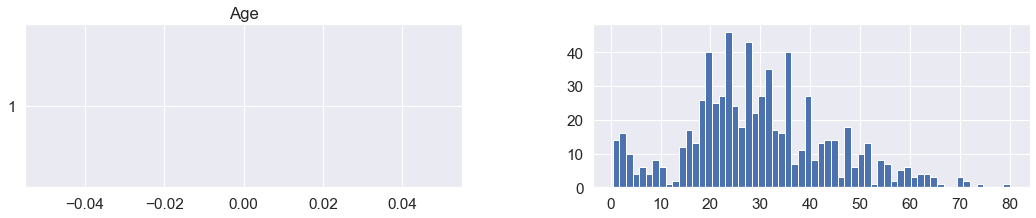

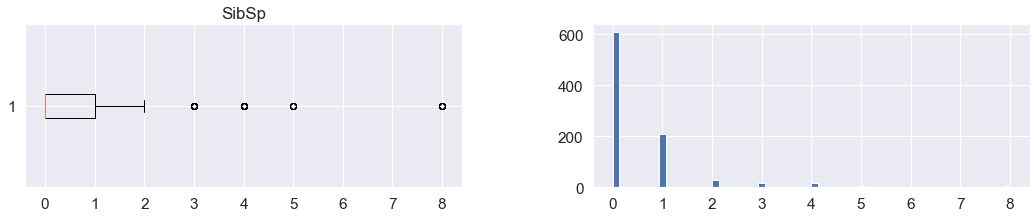

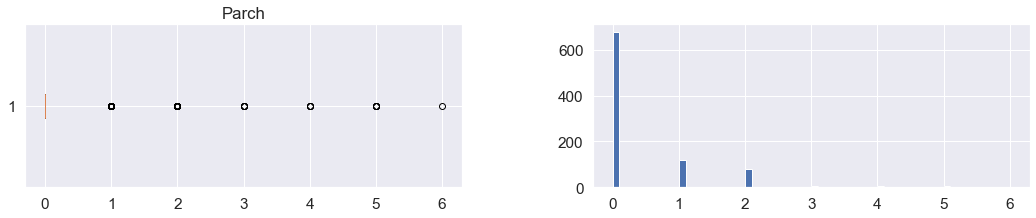

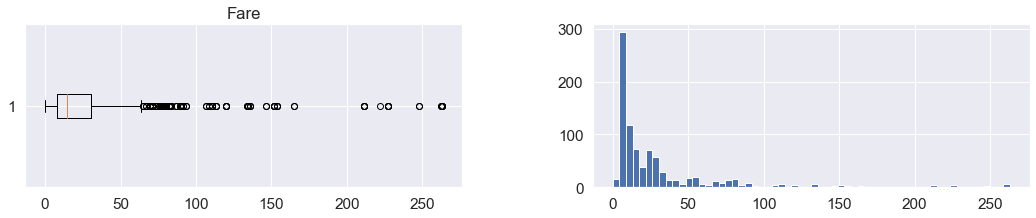

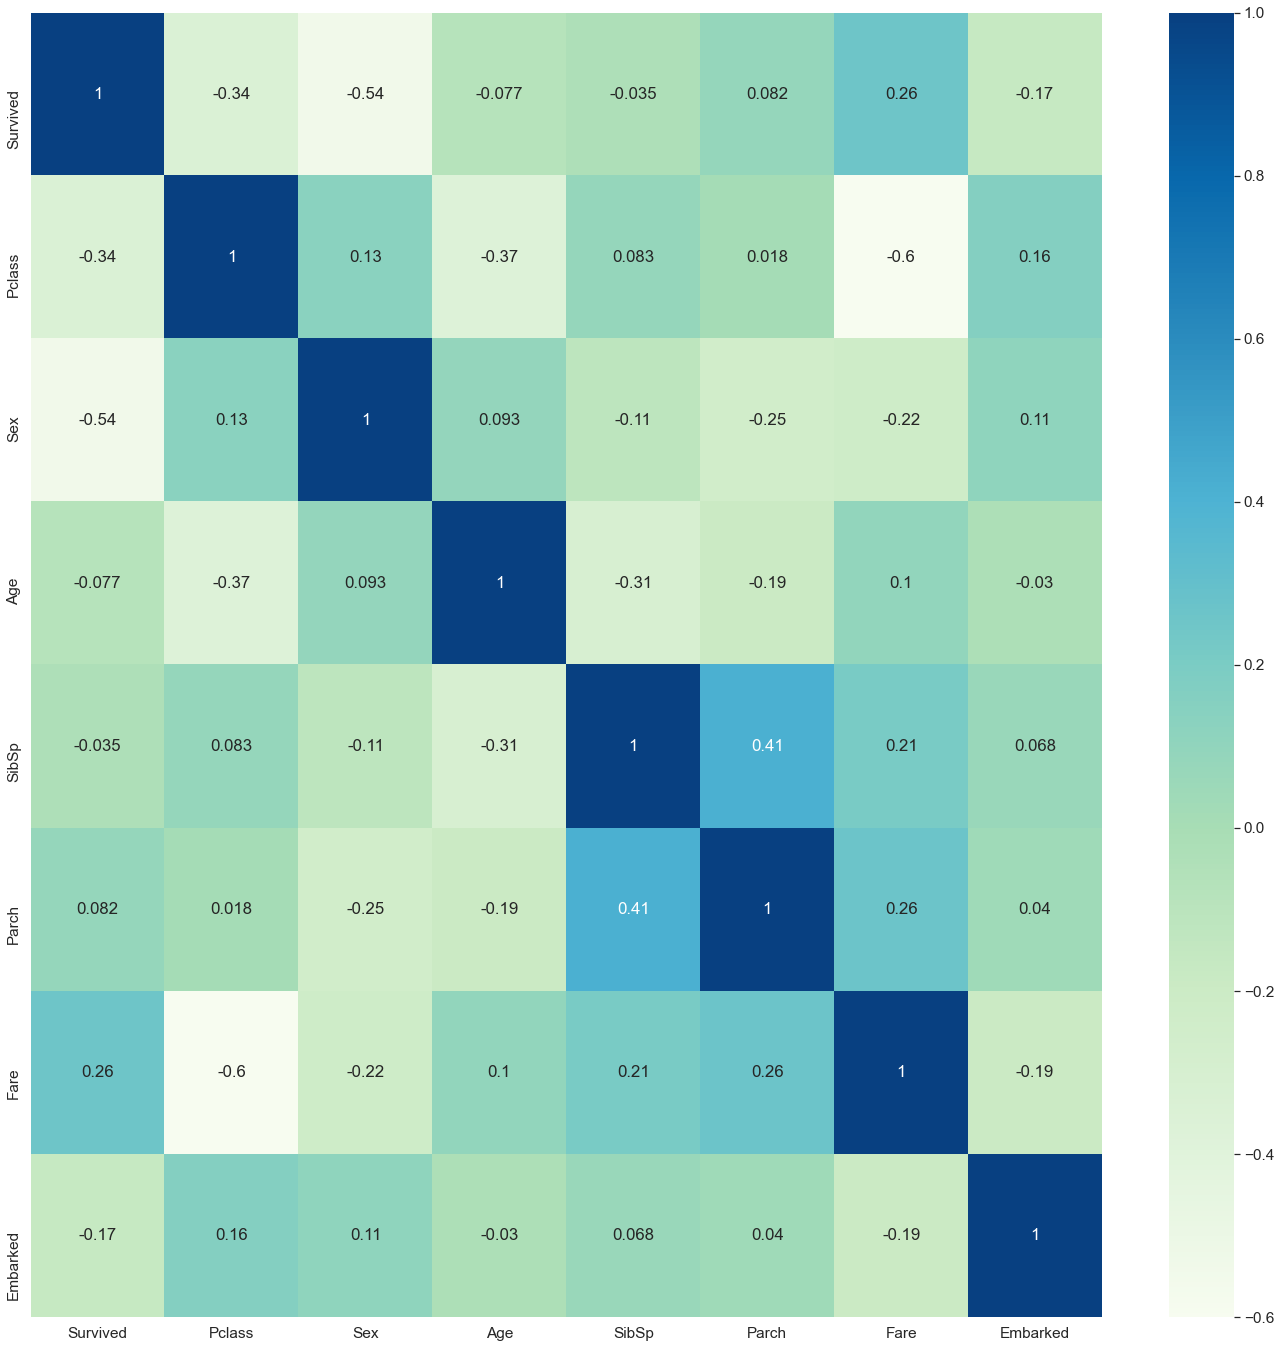

In [79]:
a.loc[a.Fare > 300, 'Fare'] = a.Fare.median()

def graphs(colm):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(18, 3)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.boxplot(a[colm], vert=False)
    ax1.set_title(colm)
    ax2.hist(a[colm], bins=60)
    plt.show()
    
graphs('Age')
graphs('SibSp')
graphs('Parch')
graphs('Fare')

plt.figure(figsize=(24,24))
sns.set(font_scale=1.4)
sns.heatmap(a.corr(),cmap='GnBu',annot=True)
plt.show()

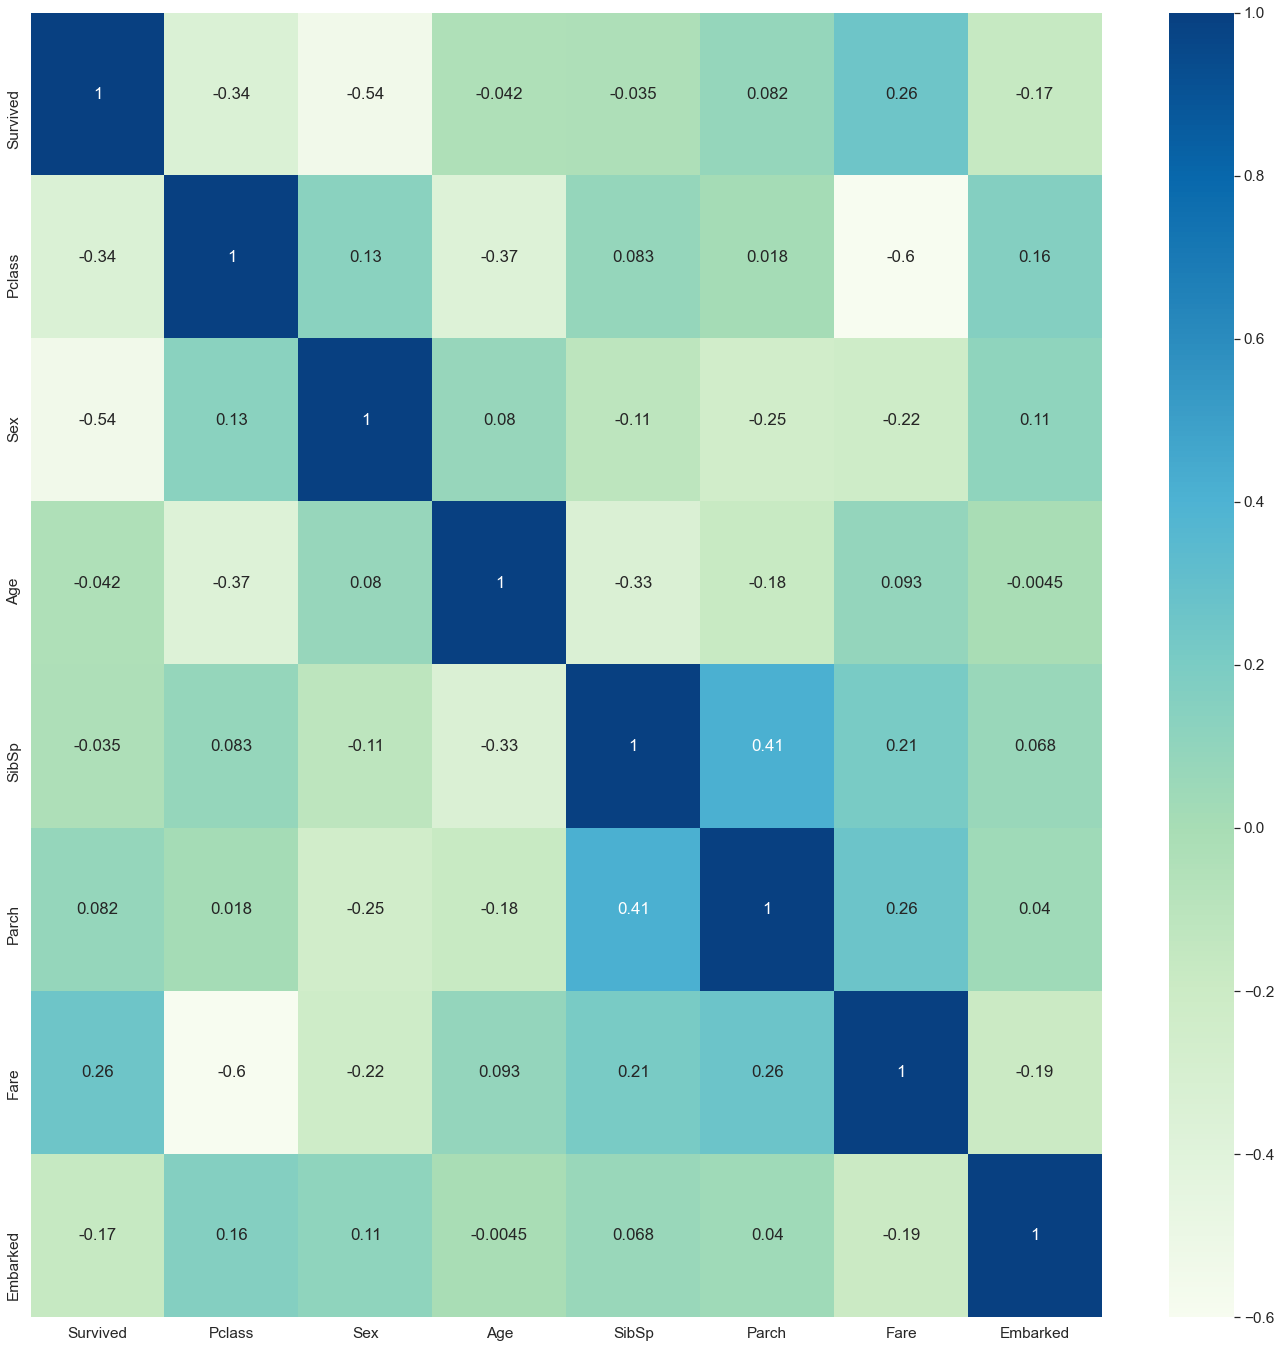

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [80]:
a.Age = a.Age.fillna(-1)
def age(colm):
    for i in range(len(a)):
        if a.at[i, colm] == -1:
            a.at[i, colm] = a.Age.median() - (a.at[i, 'SibSp']/a.SibSp.max()) * a.Age.median()

age('Age')

plt.figure(figsize=(24,24))
sns.set(font_scale=1.4)
sns.heatmap(a.corr(),cmap='GnBu',annot=True)
plt.show()

a.info()

In [81]:
y = pd.DataFrame(a['Survived'], columns=['Survived'])

a = a.drop('Survived', axis=1)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(a, y, test_size=0.01, random_state=42)

lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

accuracy_score(y_valid, y_pred)

c:\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8888888888888888

In [83]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.7981859410430839

In [84]:
b = pd.read_csv('test.csv')
out = pd.DataFrame(b.PassengerId)
b = b.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
b.Fare = b.Fare.fillna(b.Fare.median())
b.loc[a.Fare > 300, 'Fare'] = b.Fare.median()
b.Age = b.Age.fillna(-1)
b.loc[b.Embarked == 'C', 'Embarked'] = 0
b.loc[b.Embarked == 'Q', 'Embarked'] = 1
b.loc[b.Embarked == 'S', 'Embarked'] = 2
b.Embarked = b.Embarked.fillna(2)
b.Embarked = b.Embarked.astype('int64')
b.loc[b.Sex == 'female', 'Sex'] = 0
b.loc[b.Sex == 'male', 'Sex'] = 1
b.Sex = b.Sex.astype('int64')

def age(colm):
    for i in range(len(b)):
        if b.at[i, colm] == -1:
            b.at[i, colm] = b.Age.median() - (b.at[i, 'SibSp']/b.SibSp.max()) * b.Age.median()

age('Age')

X_valid = b
y_valid = lr.predict(X_valid)
out['Survived'] = y_valid
out.to_csv('titanic.csv', index=False)

b.describe()
b.info()
b.head()
out.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
